# Some Basic Circuits Using Qiskit

In [86]:
from qiskit import *
import ipywidgets as pyw
from IPython.display import display,clear_output,Image
from qiskit.tools.visualization import plot_histogram

# The Half - Adder
## Make Registers

In [87]:
qr = QuantumRegister(4)
cr = ClassicalRegister(2)

## Make Circuit

In [88]:
circ = QuantumCircuit(qr,cr)

## Just a function to test our circuit

In [89]:
def test(circuit):
    backend = BasicAer.get_backend("qasm_simulator")
    job = execute(circuit, backend, shots=1)
    result = job.result()
    return list(result.get_counts().keys())[0]

## Input

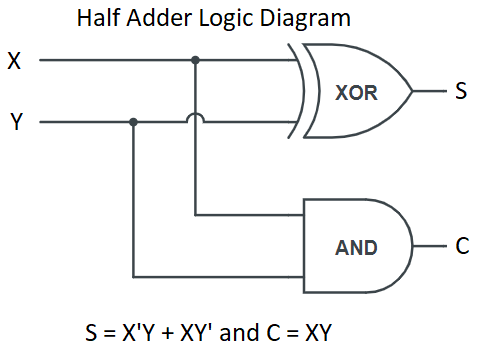

In [90]:
circ.x(0) #set both qubits to 1(i.e to simulate 1+1)
circ.x(1)
Image('../images/halfadder.png')

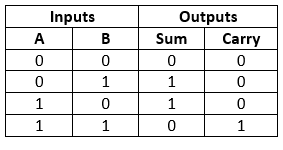

In [91]:
Image('../images/halfaddertt.png')

## Sum using XOR Gate

In [92]:
circ.cx(0,2)#XOR
circ.measure(2,0)
print(f'partial output: {test(circ)}')
circ.cx(1,2)
circ.measure(2,0)
print(f'Final output: {test(circ)}')

partial output: 01
Final output: 00


## Carry Using AND Gate

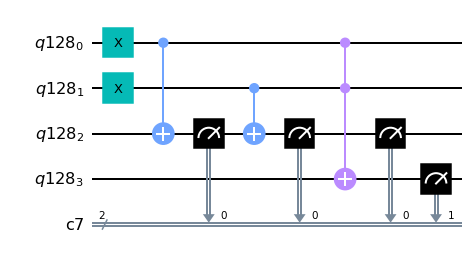

In [93]:

circ.ccx(0,1,3)#AND 
circ.measure(2,0)
circ.measure(3,1)
circ.draw('mpl')

A	B	S	C
0	0	0	0
0	1	1	0
1	0	1	0
1	1	0	1


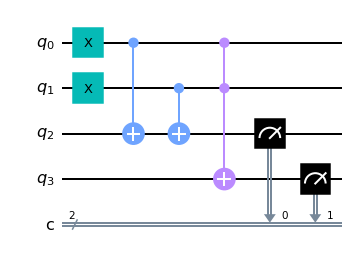

In [101]:

print("A\tB\tS\tC")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(4,2)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    circ.cx(0,2)
    circ.cx(1,2)
    circ.ccx(0,1,3)#AND 
    circ.measure(3,1)
    circ.measure(2, 0)
    print(f"{a}\t{b}\t{test(circ)[1]}\t{test(circ)[0]}")

circ.draw('mpl')